In [1]:
import numpy as np
import matplotlib.pylab as plt

n=1.5
fs = 15
fss = 12
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'cyan', 'black', 'fuchsia']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5)), (2,(2,2,5)), (10,(2,2)), (1,(2,5))]
lw = 2  # plt default: 1.5

In [2]:
def find_Heflash(MT):
    for i in range(len(MT[:,4])):
        if(MT[i,4]>0):
            return i
def find_COflash(MT):
    for i in range(len(MT[:,5])):
        if(MT[i,5]>0):
            return i

In [3]:
'''
%matplotlib widget
Mr= [3.80302836424899, 3.80287136188324]
tr= [0, 26.8865032930836]
M= [3.80302836424899, 3.803028355582833, 3.803028354499564, 3.803028353957929, 3.80287136188324]
t= [0, 0.001953125000000, 0.002197265625000, 0.002319335937500, 26.8865032930836]


fig = plt.figure(figsize=[n*4.8,n*4.8])
_ = plt.plot(tr,Mr)
_ = plt.scatter(t,M)
'''

'\n%matplotlib widget\nMr= [3.80302836424899, 3.80287136188324]\ntr= [0, 26.8865032930836]\nM= [3.80302836424899, 3.803028355582833, 3.803028354499564, 3.803028353957929, 3.80287136188324]\nt= [0, 0.001953125000000, 0.002197265625000, 0.002319335937500, 26.8865032930836]\n\n\nfig = plt.figure(figsize=[n*4.8,n*4.8])\n_ = plt.plot(tr,Mr)\n_ = plt.scatter(t,M)\n'

In [4]:
list_nomi=["#", "ID name", "Worldtime", r"$M_{TOT}$", r"$M_{He}$", r"$M_{CO}$", "Radius", "Luminosity", "Temperature", "Phase", "RemnantType"]
for i in range(len(list_nomi)):
    print(str(i)+")  "+list_nomi[i])

direc = '/mnt/c/Users/m.mencagli/OneDrive - CINECA/Documenti/roba per la tesi phd/old_data/sevn_comparison/'
name = 'mass_test.dat'
with open(direc + name) as fp:
    mt = np.loadtxt(fp)
# 0: tempo, 1: massa cpu prova, 2: massa predictor, 3: massa corrector

#irecSI = '/home/matti/programming/isteddas/cmake-build-stevo/bin/sevn_output/'
#nameSI = 'output_0.dat' output_ist_with_sevn
direcSI = direc
nameSI = 'output_ist_with_sevn.dat'
with open(direcSI + nameSI) as fp:
    mtSI_tmp = np.loadtxt(fp)
INDEXCHEVUOI=1008
mtSI = [i for i in mtSI_tmp if i[0]==INDEXCHEVUOI]
mtSI = np.asarray(mtSI)
del(mtSI_tmp)

#direcS = '/home/matti/programming/sevn/sevn_output/'
#nameS = 'output_0.dat'
direcS = direc
nameS = 'output_sevn.dat'
with open(direcS + nameS) as fp:
    mtS = np.loadtxt(fp)

# t=[0, 5.8949376274365148376]
# m=[0.0462579312249484, 0.0452765872191029]
# t = np.asarray(t)
# m = np.asarray(m)

0)  #
1)  ID name
2)  Worldtime
3)  $M_{TOT}$
4)  $M_{He}$
5)  $M_{CO}$
6)  Radius
7)  Luminosity
8)  Temperature
9)  Phase
10)  RemnantType


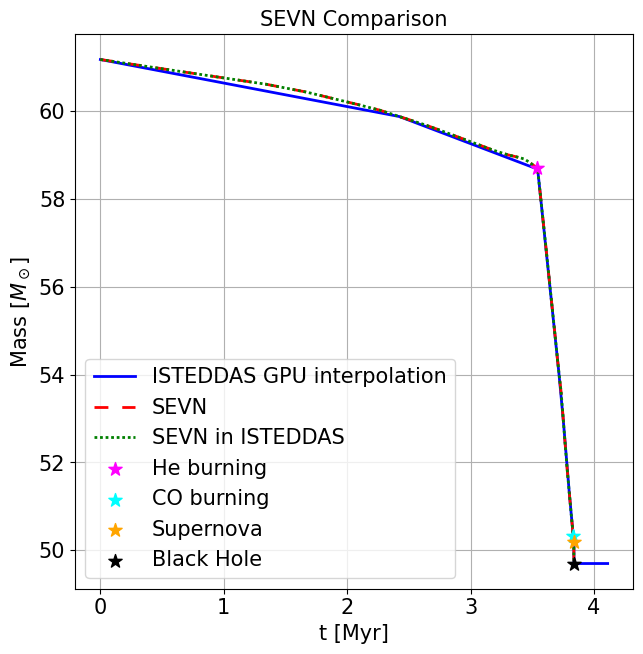

In [5]:
#%matplotlib widget
#%matplotlib inline
m_u = 1322.380429
t_u = 0.411051801011542
# t_u = 1

_ = plt.figure(0, figsize=[n*4.8,n*4.8])

# _ = plt.plot(t*t_u, m*m_u, color='black', linewidth=2, label='Prima retta check')
# _ = plt.plot(mt[:,0]*t_u, mt[:,1]*m_u, label='CPU_prova')
# _ = plt.plot(mt[:,0]*t_u, mt[:,2]*m_u, linestyle='--', label='GPU_predictor')
# _ = plt.plot(mt[:,0]*t_u, mt[:,3]*m_u, linestyle='-.', label='GPU_corrector')
_ = plt.plot(mt[:,0]*t_u, mt[:,2]*m_u, linestyle=lin[0], color=col[0], linewidth=2, label='ISTEDDAS GPU interpolation')
_ = plt.plot(mtS[:,2], mtS[:,3], linestyle=lin[5], color=col[1], linewidth=2, label='SEVN')
_ = plt.plot(mtSI[:-1,2], mtSI[:-1,3], linestyle=lin[2], color=col[2], linewidth=2, label='SEVN in ISTEDDAS')

HE_idx = find_Heflash(mtS); CO_idx = find_COflash(mtS); SN_idx = -2; BH_idx = -1
_ = plt.scatter(mtS[HE_idx,2], mtS[HE_idx,3], marker="*", color="fuchsia", s=100, label='He burning', zorder=10)
_ = plt.scatter(mtS[CO_idx,2], mtS[CO_idx,3], marker="*", color="cyan", s=100, label='CO burning', zorder=10)
_ = plt.scatter(mtS[SN_idx,2], mtS[SN_idx,3], marker="*", color="orange", s=100, label='Supernova', zorder=10)
_ = plt.scatter(mtS[BH_idx,2], mtS[BH_idx,3], marker="*", color="black", s=100, label='Black Hole', zorder=10)


#_ = plt.yscale('log', base=10)
_ = plt.legend(fontsize=fs)
_ = plt.xlabel('t [Myr]', fontsize=fs)
_ = plt.ylabel(r'Mass [$M_\odot$]', fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.title("SEVN Comparison", fontsize=fs)
_ = plt.grid()

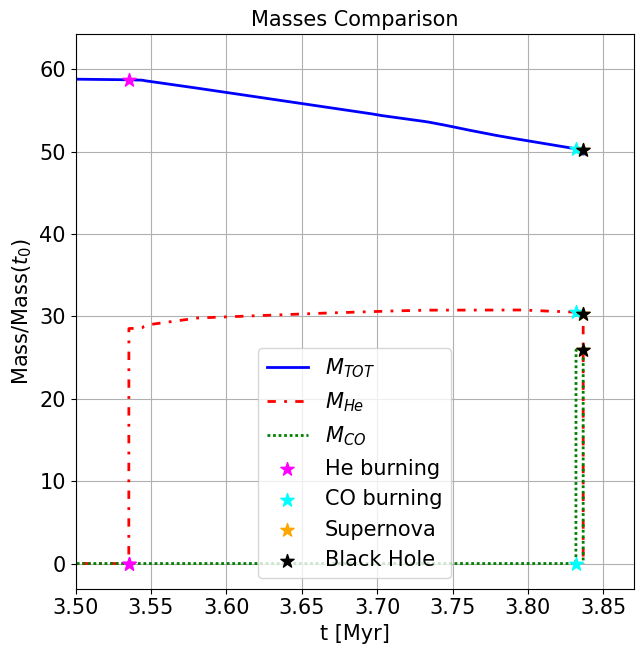

In [7]:
def plottttt(ax):
    j=0
    HE_idx = find_Heflash(mtS); CO_idx = find_COflash(mtS); SN_idx = -2; BH_idx = -1
    for k in listino:
        _ = ax.plot(mtS[:,2], mtS[:,k], linestyle=lin[j], color=col[j], linewidth=2, label=r'%s'%list_nomi[k]); j+=1
        _ = ax.scatter(mtS[HE_idx,2], mtS[HE_idx,k], marker="*", color="fuchsia", s=100, label='He burning', zorder=10)
        _ = ax.scatter(mtS[CO_idx,2], mtS[CO_idx,k], marker="*", color="cyan", s=100, label='CO burning', zorder=10)
        _ = ax.scatter(mtS[SN_idx,2], mtS[SN_idx,k], marker="*", color="orange", s=100, label='Supernova', zorder=10)
        _ = ax.scatter(mtS[BH_idx,2], mtS[BH_idx,k], marker="*", color="black", s=100, label='Black Hole', zorder=10)
    
    handles, labels = ax.get_legend_handles_labels()
    poping_list = [1,2,3,4,6,7,8,9]
    #poping_list = []
    for i in poping_list[::-1]:
        handles.pop(i)
        labels.pop(i)
    
    _ = plt.xlim(3.5,3.87)
    #_ = plt.ylim(10**-14, 10**-2)
    _ = ax.legend(handles, labels, fontsize=fs)
    _ = ax.set_xlabel('t [Myr]', fontsize=fs)
    _ = ax.set_ylabel(r'Mass/Mass($t_0$)', fontsize=fs)
    #_ = ax.set_xticks(fontsize=fs)
    #_ = ax.set_yticks(fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.set_title("Masses Comparison", fontsize=fs)
    
#%matplotlib widget
m_u = 1322.380429
t_u = 0.411051801011542
# t_u = 1
listino=[3,4,5]

#_ = plt.close()
fig = plt.figure(0, figsize=[n*4.8,n*4.8])
ax = fig.subplots()

plottttt(ax)

_ = plt.grid()
_ = plt.show()

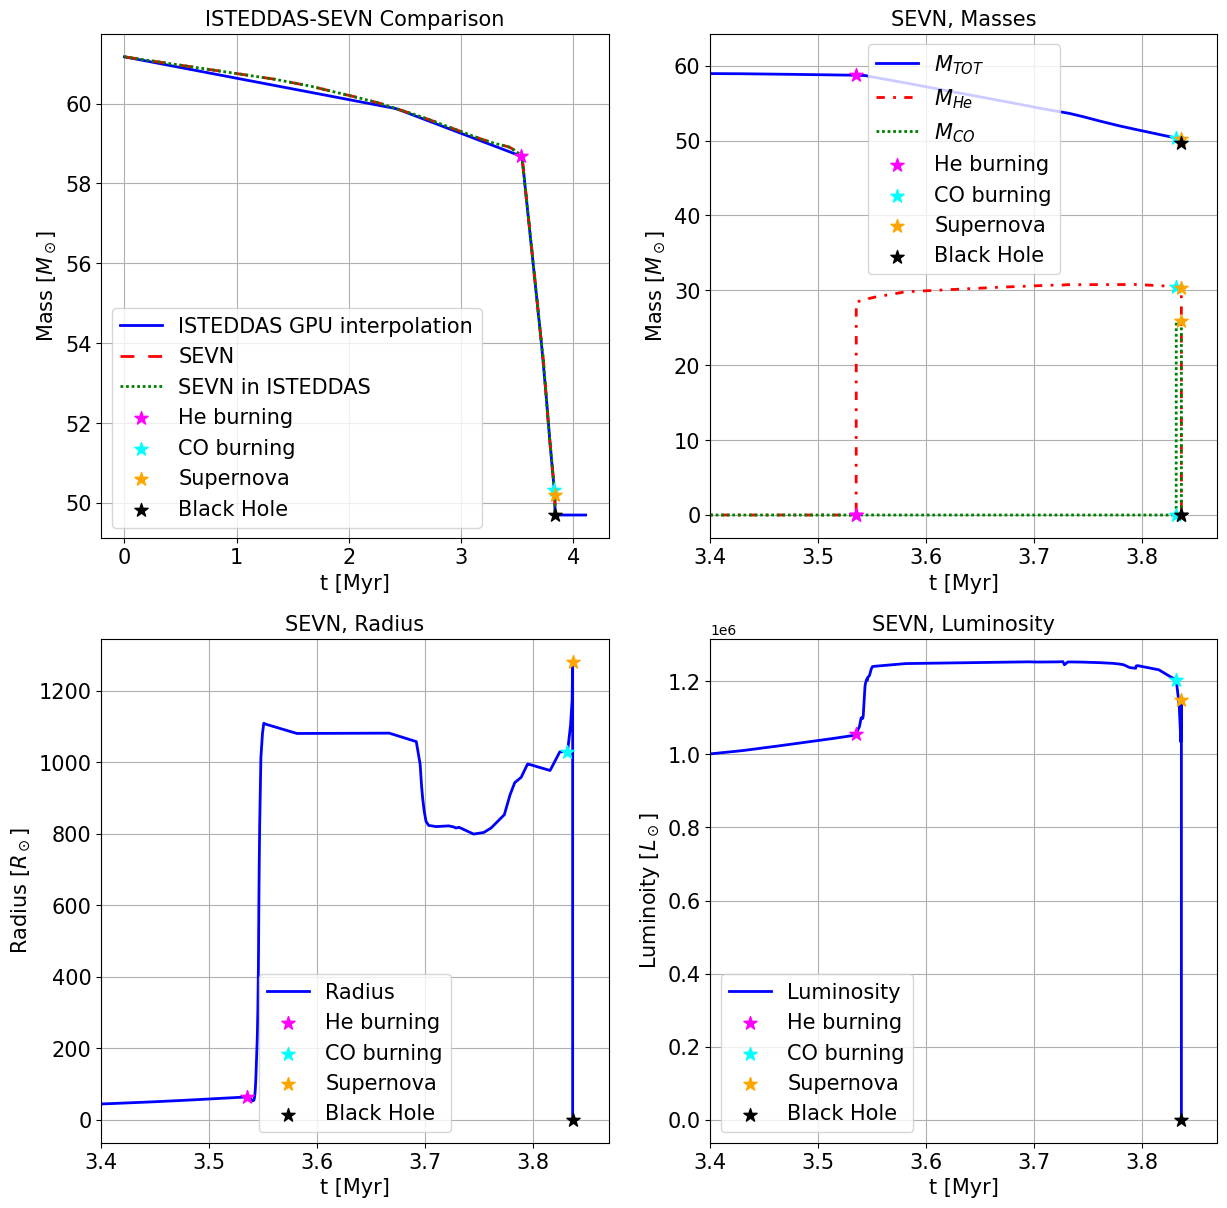

In [61]:
def plot_Q(ax, LIS, title, ylab):
    j=0
    HE_idx = find_Heflash(mtS); CO_idx = find_COflash(mtS); SN_idx = -2; BH_idx = -1
    checkM =  len(LIS) > 1
    
    for k in LIS:
        _ = ax.plot(mtS[:,2], mtS[:,k], linestyle=lin[j], color=col[j], linewidth=2, label=r'%s'%list_nomi[k]); j+=1
        _ = ax.scatter(mtS[HE_idx,2], mtS[HE_idx,k], marker="*", color="fuchsia", s=100, label='He burning', zorder=10)
        _ = ax.scatter(mtS[CO_idx,2], mtS[CO_idx,k], marker="*", color="cyan", s=100, label='CO burning', zorder=10)
        _ = ax.scatter(mtS[SN_idx,2], mtS[SN_idx,k], marker="*", color="orange", s=100, label='Supernova', zorder=10)
        _ = ax.scatter(mtS[BH_idx,2], mtS[BH_idx,k], marker="*", color="black", s=100, label='Black Hole', zorder=10)
    
    handles, labels = ax.get_legend_handles_labels()
    if checkM: poping_list = [1,2,3,4,6,7,8,9]
    else : poping_list = []
    for i in poping_list[::-1]:
        handles.pop(i)
        labels.pop(i)
    
    #_ = ax.set_xlim(3.5,3.87)
    _ = ax.set_xlim(3.4,3.87)
    #_ = plt.ylim(10**-14, 10**-2)
    _ = ax.legend(handles, labels, fontsize=fs)
    _ = ax.set_xlabel('t [Myr]', fontsize=fs)
    _ = ax.set_ylabel(ylab, fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.set_title(title, fontsize=fs)
    _ = ax.grid()


def plot_main(ax):
    HE_idx = find_Heflash(mtS); CO_idx = find_COflash(mtS); SN_idx = -2; BH_idx = -1
    
    _ = ax.plot(mt[:,0]*t_u, mt[:,2]*m_u, linestyle=lin[0], color=col[0], linewidth=2, label='ISTEDDAS GPU interpolation')
    _ = ax.plot(mtS[:,2], mtS[:,3], linestyle=lin[5], color=col[1], linewidth=2, label='SEVN')
    _ = ax.plot(mtSI[:-1,2], mtSI[:-1,3], linestyle=lin[2], color=col[2], linewidth=2, label='SEVN in ISTEDDAS')
    
    _ = ax.scatter(mtS[HE_idx,2], mtS[HE_idx,3], marker="*", color="fuchsia", s=100, label='He burning', zorder=10)
    _ = ax.scatter(mtS[CO_idx,2], mtS[CO_idx,3], marker="*", color="cyan", s=100, label='CO burning', zorder=10)
    _ = ax.scatter(mtS[SN_idx,2], mtS[SN_idx,3], marker="*", color="orange", s=100, label='Supernova', zorder=10)
    _ = ax.scatter(mtS[BH_idx,2], mtS[BH_idx,3], marker="*", color="black", s=100, label='Black Hole', zorder=10)
    
    #_ = plt.yscale('log', base=10)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_xlabel('t [Myr]', fontsize=fs)
    _ = ax.set_ylabel(r'Mass [$M_\odot$]', fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.set_title("ISTEDDAS-SEVN Comparison", fontsize=fs)
    _ = ax.grid()
    
#%matplotlib widget
m_u = 1322.380429
t_u = 0.411051801011542
# t_u = 1

#_ = plt.close()
COL = 2 ; RIG = 2
fig = plt.figure(666, figsize=[n*4.8*COL,n*4.8*RIG])
gs = fig.add_gridspec(RIG,COL)#, hspace=0)
axs = gs.subplots()

plot_main(axs[0,0])
plot_Q(axs[0,1], [3,4,5], "SEVN, Masses", r'Mass [$M_\odot$]')
plot_Q(axs[1,0], [6], "SEVN, Radius", r'Radius [$R_\odot$]')
plot_Q(axs[1,1], [7], "SEVN, Luminosity", r'Luminoity [$L_\odot$]')

direc_save = '/mnt/c/Users/m.mencagli/OneDrive - CINECA/Documenti/roba per la tesi phd/imm tesi/esempi sevn/'
if(False):
    _ = plt.savefig(direc_save+"60Msun_ex.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)